#**`1. Mount Google Drive`**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


#**`2. Define the Data Path`**

In [2]:
data_path = '/content/drive/My Drive/Machine Learning/Exoplanet.csv'


#**`3. Read the Dataset`**

In [3]:
import pandas as pd

# Read the dataset
df = pd.read_csv(data_path)

# Display the first few rows
df.head()


,No.,Planet Name,Planet Host,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,...,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,1.29,...,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,1.53,...,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,125.3210,4.56216
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,0.83,...,NaN,K0 III,4813.0,11.00,2.20,-0.24,[Fe/H],2.63,75.4392,4.91781
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,2.93,...,NaN,NaN,5338.0,0.93,0.90,0.41,[Fe/H],4.45,17.9323,6.38300
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.50000,1.66,...,NaN,NaN,5750.0,1.13,1.08,0.06,[Fe/H],4.36,21.1397,6.06428


#**`4. Feature Engineering`**

 `Handle Missing Values`

In [4]:
import pandas as pd

#Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
# For numeric columns, fill missing values with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if all missing values are handled
print("Remaining missing values in dataset:")
print(df.isnull().sum())



Remaining missing values in dataset:
No.                              0
Planet Name                      0
Planet Host                      0
Num Stars                        0
Num Planets                      0
Discovery Method                 0
Discovery Year                   0
Discovery Facility               0
Orbital Period Days              0
Orbit Semi-Major Axis            0
Mass                             0
Eccentricity                     0
Insolation Flux                  0
Equilibrium Temperature          0
Spectral Type                    0
Stellar Effective Temperature    0
Stellar Radius                   0
Stellar Mass                     0
Stellar Metallicity              0
Stellar Metallicity Ratio        0
Stellar Surface Gravity          0
Distance                         0
Gaia Magnitude                   0
dtype: int64


In [5]:
# Display the column names and data types
print(df.dtypes)

# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)



No.                                int64
Planet Name                       object
Planet Host                       object
Num Stars                          int64
Num Planets                        int64
Discovery Method                  object
Discovery Year                     int64
Discovery Facility                object
Orbital Period Days              float64
Orbit Semi-Major Axis            float64
Mass                             float64
Eccentricity                     float64
Insolation Flux                  float64
Equilibrium Temperature          float64
Spectral Type                     object
Stellar Effective Temperature    float64
Stellar Radius                   float64
Stellar Mass                     float64
Stellar Metallicity              float64
Stellar Metallicity Ratio         object
Stellar Surface Gravity          float64
Distance                         float64
Gaia Magnitude                   float64
dtype: object
Categorical Columns: Index(['Planet Name', 

`Data Transformation`

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
categorical_cols = ['Planet Name', 'Planet Host', 'Discovery Method', 'Discovery Facility', 'Spectral Type', 'Stellar Metallicity Ratio']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Display the transformed dataset
df.head()


,No.,Planet Name,Planet Host,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,...,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude
0,1,0,0,2,1,8,2007,61,326.03000,1.29,...,1057.811892,77,4742.0,19.00,2.70,-0.35,1,2.31,93.1846,4.44038
1,2,1,1,1,1,8,2009,53,516.21997,1.53,...,1057.811892,43,4213.0,29.79,2.78,-0.02,1,1.93,125.3210,4.56216
2,3,2,2,1,1,8,2008,41,185.84000,0.83,...,1057.811892,91,4813.0,11.00,2.20,-0.24,1,2.63,75.4392,4.91781
3,4,3,3,1,2,8,2002,57,1773.40002,2.93,...,1057.811892,43,5338.0,0.93,0.90,0.41,1,4.45,17.9323,6.38300
4,5,4,4,3,1,8,1996,37,798.50000,1.66,...,1057.811892,43,5750.0,1.13,1.08,0.06,1,4.36,21.1397,6.06428


`Handle Categorical Data`

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_cols = ['Planet Name', 'Planet Host', 'Discovery Method', 'Discovery Facility', 'Spectral Type', 'Stellar Metallicity Ratio']

# Create OneHotEncoder instance
ohe = OneHotEncoder(handle_unknown='ignore', dtype=int)

# Apply OneHotEncoder to categorical columns
encoded_data = ohe.fit_transform(df[categorical_cols])

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and join the encoded columns
df = df.drop(categorical_cols, axis=1)
df = df.join(encoded_df)

# Display the updated dataframe
df.head()


,No.,Num Stars,Num Planets,Discovery Year,Orbital Period Days,Orbit Semi-Major Axis,Mass,Eccentricity,Insolation Flux,Equilibrium Temperature,...,Spectral Type_175,Spectral Type_176,Spectral Type_177,Spectral Type_178,Spectral Type_179,Stellar Metallicity Ratio_0,Stellar Metallicity Ratio_1,Stellar Metallicity Ratio_2,Stellar Metallicity Ratio_3,Stellar Metallicity Ratio_4
0,1,2,1,2007,326.03000,1.29,6165.6000,0.231,446.65827,1057.811892,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,2009,516.21997,1.53,4684.8142,0.080,446.65827,1057.811892,...,0,0,0,0,0,0,1,0,0,0
2,3,1,1,2008,185.84000,0.83,1525.5000,0.000,446.65827,1057.811892,...,0,0,0,0,0,0,1,0,0,0
3,4,1,2,2002,1773.40002,2.93,1481.0878,0.370,446.65827,1057.811892,...,0,0,0,0,0,0,1,0,0,0
4,5,3,1,1996,798.50000,1.66,565.7374,0.680,446.65827,1057.811892,...,0,0,0,0,0,0,1,0,0,0


`Normalize the Data`

In [8]:
# Select the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical columns
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())

# Display the normalized data
df.head()


,No.,Num Stars,Num Planets,Discovery Year,Orbital Period Days,Orbit Semi-Major Axis,Mass,Eccentricity,Insolation Flux,Equilibrium Temperature,...,Spectral Type_175,Spectral Type_176,Spectral Type_177,Spectral Type_178,Spectral Type_179,Stellar Metallicity Ratio_0,Stellar Metallicity Ratio_1,Stellar Metallicity Ratio_2,Stellar Metallicity Ratio_3,Stellar Metallicity Ratio_4
0,0.000000,0.333333,0.000000,0.56250,8.107943e-07,0.000171,0.348966,0.243158,0.009947,0.251953,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000219,0.000000,0.000000,0.62500,1.283904e-06,0.000203,0.265155,0.084211,0.009947,0.251953,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000437,0.000000,0.000000,0.59375,4.620629e-07,0.000110,0.086341,0.000000,0.009947,0.251953,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000656,0.000000,0.142857,0.40625,4.411217e-06,0.000390,0.083827,0.389474,0.009947,0.251953,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000875,0.666667,0.000000,0.21875,1.986093e-06,0.000221,0.032019,0.715789,0.009947,0.251953,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


`Handling Class Imbalance`

In [9]:
print(df.columns)


Index(['No.', 'Num Stars', 'Num Planets', 'Discovery Year',
       'Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
       'Insolation Flux', 'Equilibrium Temperature',
       ...
       'Spectral Type_175', 'Spectral Type_176', 'Spectral Type_177',
       'Spectral Type_178', 'Spectral Type_179', 'Stellar Metallicity Ratio_0',
       'Stellar Metallicity Ratio_1', 'Stellar Metallicity Ratio_2',
       'Stellar Metallicity Ratio_3', 'Stellar Metallicity Ratio_4'],
      dtype='object', length=8243)


In [10]:
import pandas as pd

# Assuming df is already loaded
# Dynamically select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dynamically select categorical columns (non-numeric)
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 4: Impute missing values
# For numeric columns, fill missing values with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 5: Verify Data Quality
# Check for remaining missing values
missing_values = df.isnull().sum()
print("Remaining missing values after imputation:")
print(missing_values)

# Check column data types
print("\nColumn data types:")
print(df.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Optional: Display unique values for categorical columns (just the first few)
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:5]} ...")  # Display first 5 unique values


Remaining missing values after imputation:
No.                            0
Num Stars                      0
Num Planets                    0
Discovery Year                 0
Orbital Period Days            0
                              ..
Stellar Metallicity Ratio_0    0
Stellar Metallicity Ratio_1    0
Stellar Metallicity Ratio_2    0
Stellar Metallicity Ratio_3    0
Stellar Metallicity Ratio_4    0
Length: 8243, dtype: int64

Column data types:
No.                            float64
Num Stars                      float64
Num Planets                    float64
Discovery Year                 float64
Orbital Period Days            float64
                                ...   
Stellar Metallicity Ratio_0    float64
Stellar Metallicity Ratio_1    float64
Stellar Metallicity Ratio_2    float64
Stellar Metallicity Ratio_3    float64
Stellar Metallicity Ratio_4    float64
Length: 8243, dtype: object

Summary statistics for numeric columns:
              No.    Num Stars  Num Planets  Disc

`Checking Multicollinearity`

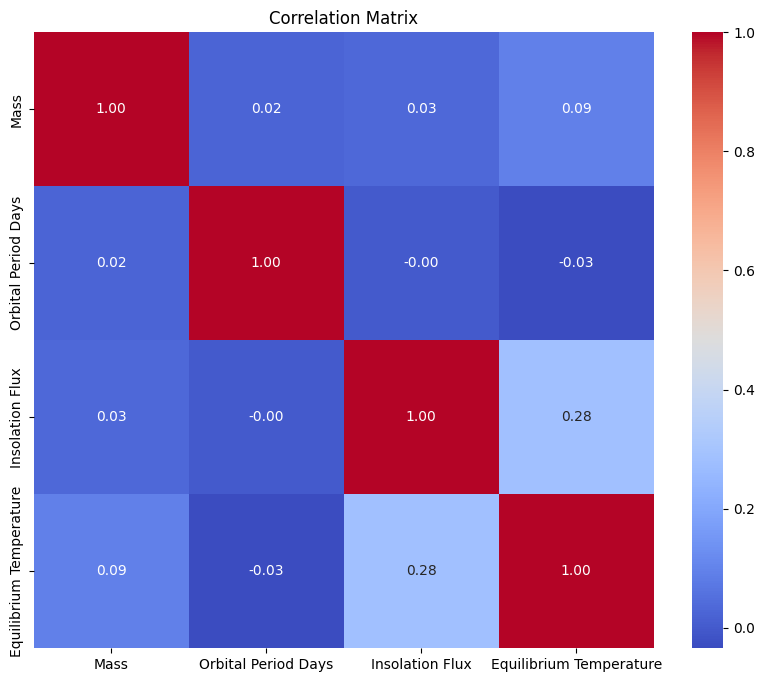

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the correlation matrix
numerical_cols = ['Mass', 'Orbital Period Days', 'Insolation Flux', 'Equilibrium Temperature']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


`Variance Inflation Factor (VIF)`

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant (intercept) term to the dataset
X = add_constant(df[numerical_cols])

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF for each feature
print(vif_data)


                   Feature        VIF
0                    const  17.464468
1                     Mass   1.009217
2      Orbital Period Days   1.002009
3          Insolation Flux   1.087781
4  Equilibrium Temperature   1.097403


`Condition Index`

In [13]:
from numpy.linalg import svd
import numpy as np

# Perform Singular Value Decomposition (SVD)
U, S, Vt = svd(X)

# Calculate the condition index
condition_index = np.max(S) / S
print(f'Condition Index: {condition_index}')


Condition Index: [ 1.         16.73963646 20.81763887 69.25332721 70.09916084]


`Addressing Multicollinearity`

In [14]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [15]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Select only numeric columns for the features (X)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define features (X) and target (y)
X = df[numeric_cols].drop(columns=['Stellar Mass'])  # Dropping 'Stellar Mass' from features
y = df['Stellar Mass']  # Using 'Stellar Mass' as the target column

# Handle missing values by imputing (filling with the mean of each column)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Apply imputer to the features

# Impute missing values in target variable y as well
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Apply imputer to the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Apply Ridge Regression (L2 Regularization) and Lasso Regression (L1 Regularization)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')


Ridge Regression - MSE: 0.0008199824496152964, R2: 0.5805869518186162
Lasso Regression - MSE: 0.001961845847765575, R2: -0.003465071062664471


` Principal Component Analysis (PCA)`

In [16]:
print(df.columns)
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces from column names



Index(['No.', 'Num Stars', 'Num Planets', 'Discovery Year',
       'Orbital Period Days', 'Orbit Semi-Major Axis', 'Mass', 'Eccentricity',
       'Insolation Flux', 'Equilibrium Temperature',
       ...
       'Spectral Type_175', 'Spectral Type_176', 'Spectral Type_177',
       'Spectral Type_178', 'Spectral Type_179', 'Stellar Metallicity Ratio_0',
       'Stellar Metallicity Ratio_1', 'Stellar Metallicity Ratio_2',
       'Stellar Metallicity Ratio_3', 'Stellar Metallicity Ratio_4'],
      dtype='object', length=8243)


In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Define the path and read the dataset
data_path = "/content/drive/My Drive/Machine Learning/Exoplanet.csv"  # Replace with the actual path
df = pd.read_csv(data_path)
#print(df.head())  # Display the first few rows to verify

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data = df.select_dtypes(include=['float64', 'int64'])
imputed_data = imputer.fit_transform(numeric_data)

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Step 4: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_features = pca.fit_transform(scaled_data)

# Step 5: Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

# Step 6: Combine PCA features with target
target = df['Stellar Mass']  # Replace 'Target' with your actual target column name
final_data = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
final_data['Stellar Mass'] = target.values




Explained Variance Ratio: [0.17074617 0.1063115  0.10394832 0.08670534 0.07139961 0.06110389
 0.0572732  0.05425321 0.05066932 0.04644469 0.04398996 0.03745612
 0.0365336  0.02787641]
Cumulative Explained Variance: [0.17074617 0.27705767 0.38100599 0.46771133 0.53911094 0.60021483
 0.65748803 0.71174123 0.76241055 0.80885524 0.8528452  0.89030132
 0.92683492 0.95471133]


In [18]:
import pandas as pd

# Check the class distribution in the target variable
class_counts = pd.Series(y).value_counts()

print("Class distribution:")
print(class_counts)

# Optionally, calculate the percentage of each class
class_percentage = class_counts / len(y) * 100
print("\nClass percentage distribution:")
print(class_percentage)



Class distribution:
Stellar Mass
0.088085    731
0.085087     95
0.086917     79
0.084172     78
0.086002     77
           ... 
0.193962      1
0.233303      1
0.219579      1
0.342177      1
0.281793      1
Name: count, Length: 228, dtype: int64

Class percentage distribution:
Stellar Mass
0.088085    15.978142
0.085087     2.076503
0.086917     1.726776
0.084172     1.704918
0.086002     1.683060
              ...    
0.193962     0.021858
0.233303     0.021858
0.219579     0.021858
0.342177     0.021858
0.281793     0.021858
Name: count, Length: 228, dtype: float64


In [19]:
import pandas as pd

# Check the class distribution in the target variable
class_counts = pd.Series(y).value_counts()

print("Class distribution:")
print(class_counts)

# Optionally, calculate the percentage of each class
class_percentage = class_counts / len(y) * 100
print("\nClass percentage distribution:")
print(class_percentage)


Class distribution:
Stellar Mass
0.088085    731
0.085087     95
0.086917     79
0.084172     78
0.086002     77
           ... 
0.193962      1
0.233303      1
0.219579      1
0.342177      1
0.281793      1
Name: count, Length: 228, dtype: int64

Class percentage distribution:
Stellar Mass
0.088085    15.978142
0.085087     2.076503
0.086917     1.726776
0.084172     1.704918
0.086002     1.683060
              ...    
0.193962     0.021858
0.233303     0.021858
0.219579     0.021858
0.342177     0.021858
0.281793     0.021858
Name: count, Length: 228, dtype: float64


#**`5. Exploratory Data Analysis (EDA)`**

In [20]:
# Basic descriptive statistics for numerical columns
df.describe()


,No.,Num Stars,Num Planets,Discovery Year,Orbital Period Days,Orbit Semi-Major Axis,Mass,Eccentricity,Insolation Flux,Equilibrium Temperature,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Surface Gravity,Distance,Gaia Magnitude
count,4575.00000,4575.000000,4575.000000,4575.000000,4.413000e+03,2763.000000,2006.000000,1707.000000,370.000000,925.000000,4226.000000,4128.000000,3844.000000,3204.000000,3972.000000,4471.000000,4400.000000
mean,2288.00000,1.109945,1.787760,2014.862951,9.489932e+04,10.940380,725.123682,0.154910,446.658270,1057.811892,5439.166692,1.535300,0.972768,0.012929,4.363849,656.376212,12.432173
std,1320.83307,0.351677,1.166591,3.960923,6.053595e+06,182.398887,1338.016965,0.183289,2456.275941,561.187757,1420.268232,3.818418,0.473831,0.179547,0.430935,938.407991,2.992626
min,1.00000,1.000000,1.000000,1989.000000,9.070629e-02,0.004400,0.020000,0.000000,0.060000,50.000000,575.000000,0.010000,0.010000,-1.000000,1.200000,1.301190,2.926270
25%,1144.50000,1.000000,1.000000,2014.000000,4.437963e+00,0.055900,16.147500,0.014000,5.710000,619.000000,4989.250000,0.790000,0.790000,-0.070000,4.290000,123.739000,10.749800
50%,2288.00000,1.000000,1.000000,2016.000000,1.176305e+01,0.115100,220.887340,0.092000,45.700000,961.000000,5574.000000,0.960000,0.960000,0.020000,4.450000,434.754000,13.358800
75%,3431.50000,1.000000,2.000000,2016.000000,4.100801e+01,0.678500,740.535425,0.220000,226.525000,1457.000000,5908.000000,1.250000,1.110000,0.110000,4.560000,856.417000,14.780450
max,4575.00000,4.000000,8.000000,2021.000000,4.020000e+08,7506.000000,17668.169700,0.950000,44900.000000,4050.000000,40000.000000,83.800000,10.940000,0.545000,7.920000,8200.000000,20.186100


Stellar Mass
0.94    95
0.96    79
0.93    78
1.00    77
0.95    77
        ..
2.49     1
2.06     1
2.60     1
2.13     1
3.09     1
Name: count, Length: 227, dtype: int64


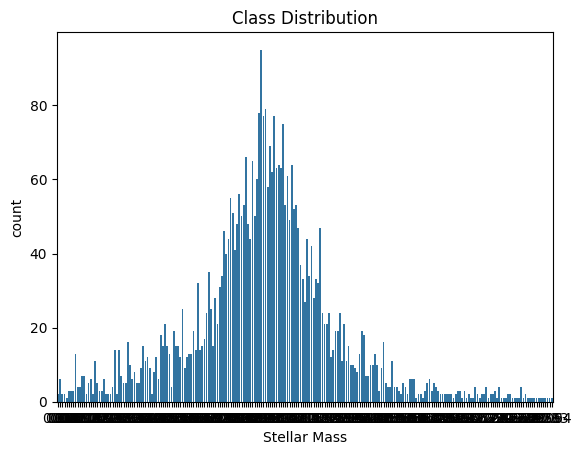

In [21]:
# Count the number of samples in each class
class_counts = df['Stellar Mass'].value_counts()  # Replace 'target' with your target variable name
print(class_counts)

# Plot the distribution of the target variable
import seaborn as sns  # Import the seaborn library
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Plot the distribution of the target variable
sns.countplot(x='Stellar Mass', data=df)  # Replace 'Stellar Mass' with the column you want to visualize
plt.title('Class Distribution')
plt.show()



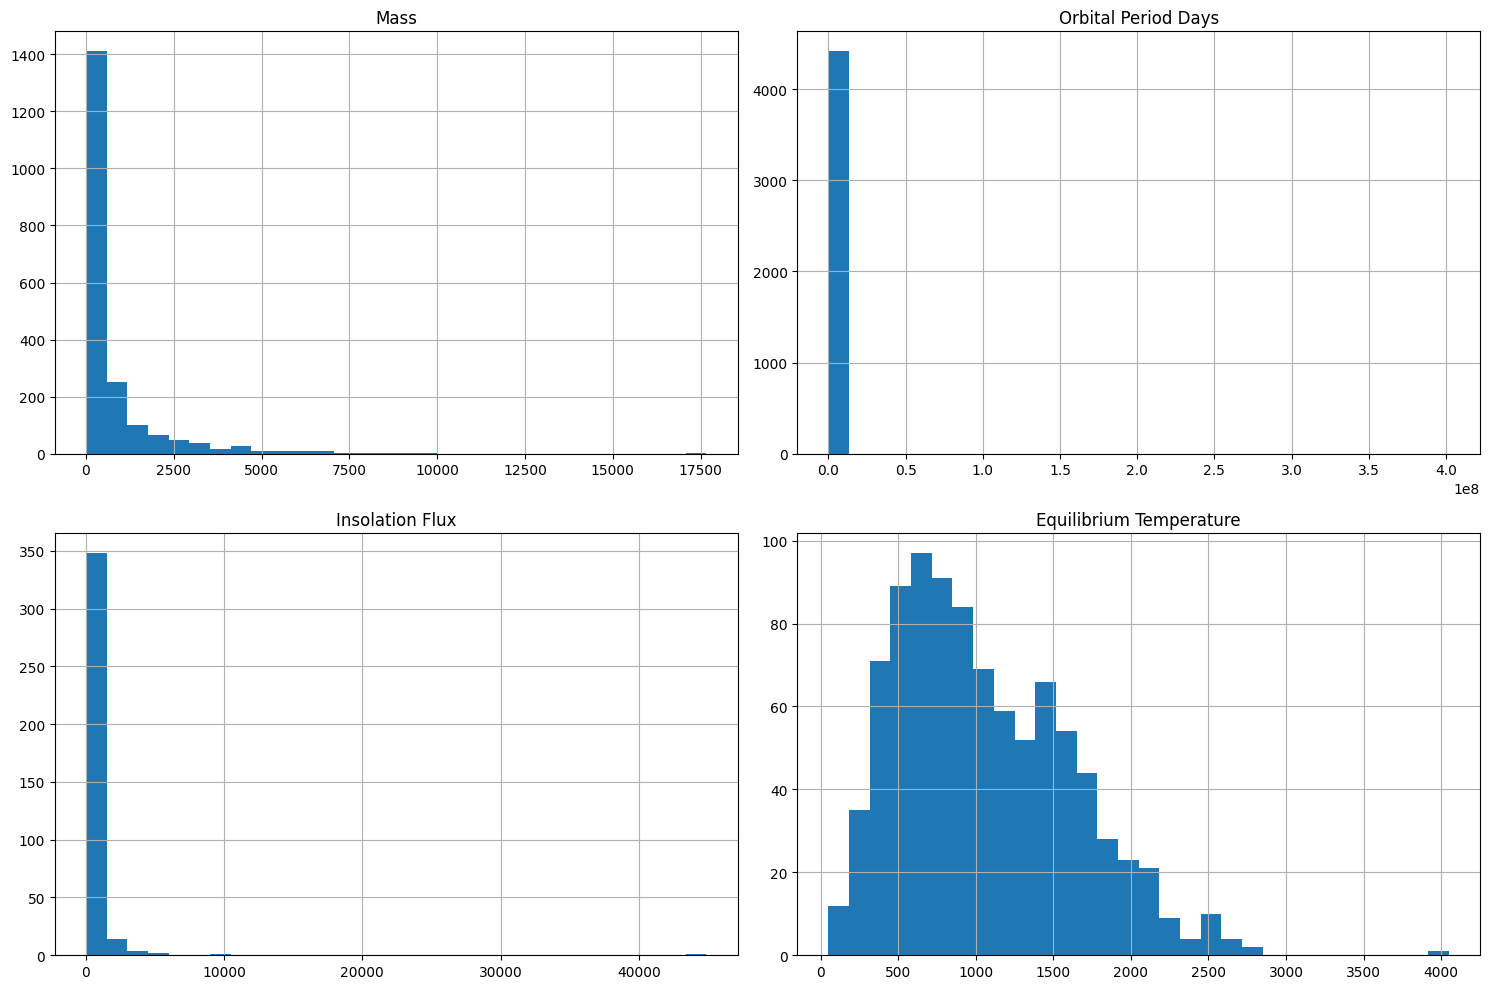

In [22]:
# Plot histograms for numerical features
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


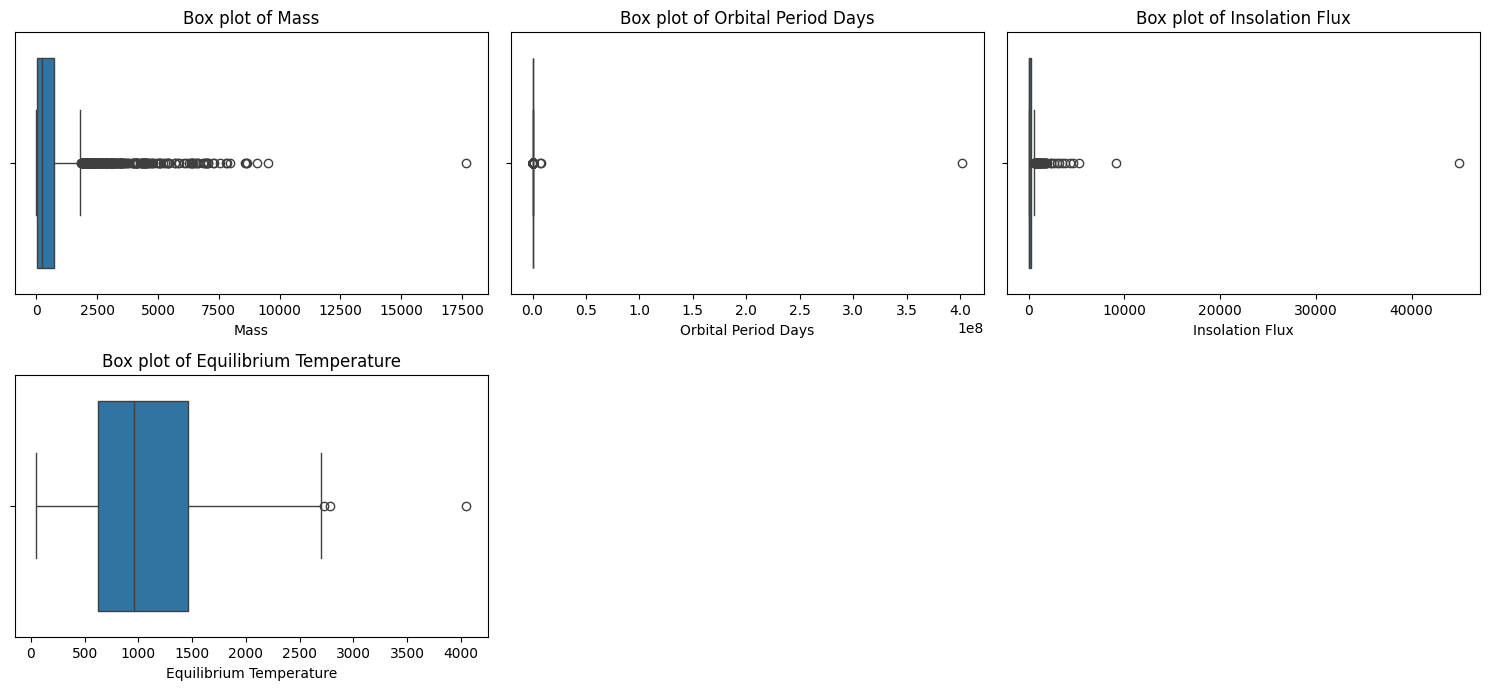

In [23]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


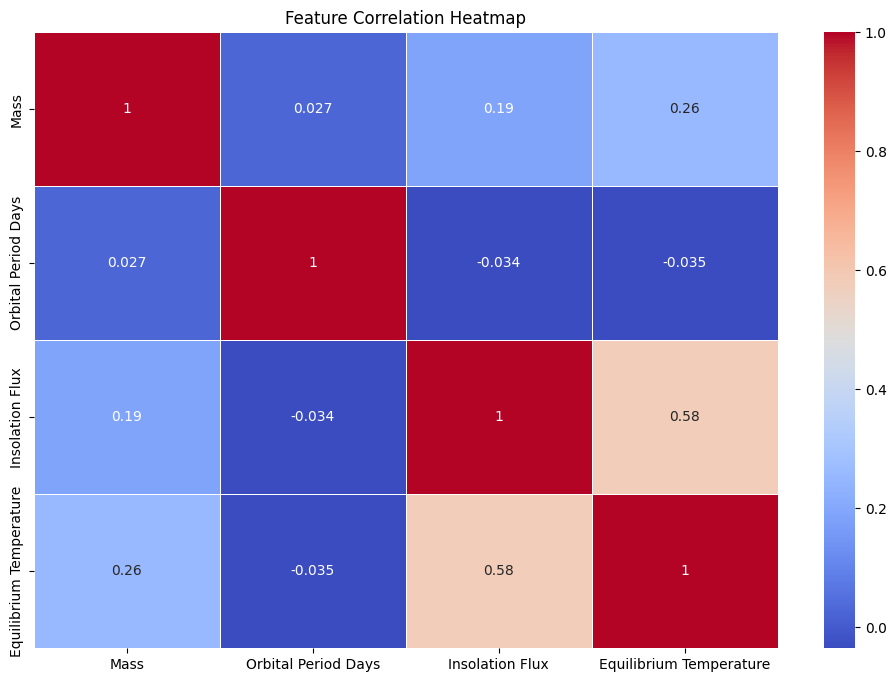

In [24]:
# Compute the correlation matrix for features
corr_matrix = df[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


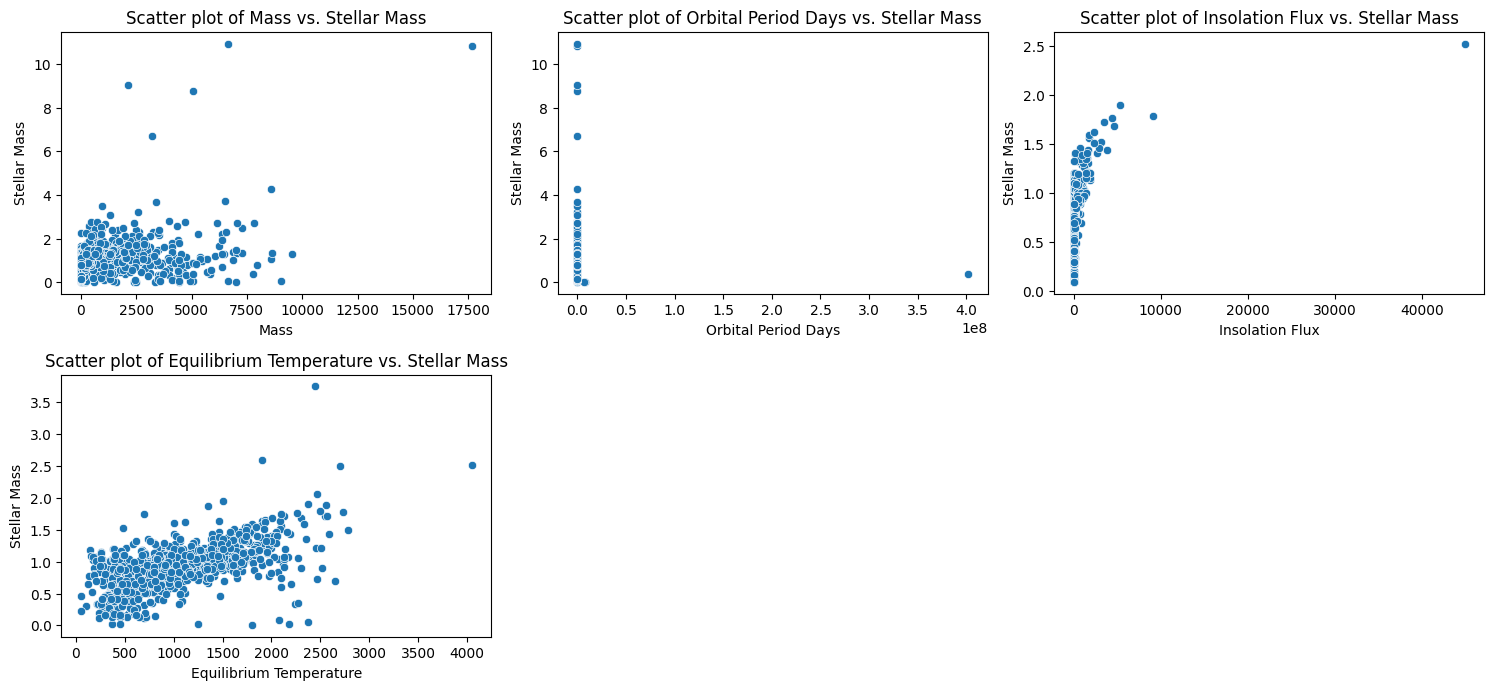

In [25]:
# Scatter plots for each independent variable vs. the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Stellar Mass'])  # Replace 'target' with your dependent variable
    plt.title(f'Scatter plot of {col} vs. Stellar Mass')
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = df.drop(columns=['Stellar Mass'])  # Replace 'target_column_name' with the actual target column name
y = df['Stellar Mass']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the mean
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Fill missing values in y (target) with the mean or drop rows with NaNs
y = y.fillna(y.mean())  # or use y.dropna() to remove rows with NaN in y

# Optionally, apply one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# After fitting, you can evaluate or use the model for predictions


RandomForestRegressor(random_state=42)

#**`6.Feature Transformation, Visualization, and Feature Selection`**

`a. PCA (Principal Component Analysis)`

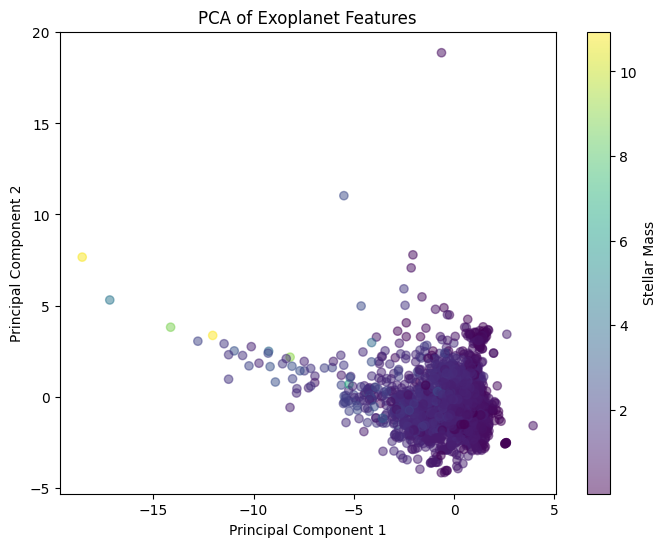

Explained Variance Ratio: [0.1623634  0.11491213]


In [27]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Import LinearRegression
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Remove rows with NaN in the target variable
df_cleaned = df.dropna(subset=['Stellar Mass'])

# Now split the data again
X_clean = df_cleaned.drop(columns=['No.', 'Stellar Mass'])  # Dropping 'No.' (index column) and 'Stellar Mass' (target column)
y_clean = df_cleaned['Stellar Mass']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
numeric_features = X_clean.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Combine preprocessing steps into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Create a pipeline with a regression model (Linear Regression)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Using regression for predicting Stellar Mass
])

# Fit the model with the pipeline
pipeline.fit(X_train, y_train)

# Step 1: Preprocess the features using the preprocessor part of the pipeline
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X_clean)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_preprocessed)

# Step 3: Plot the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clean, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Exoplanet Features')
plt.colorbar(label='Stellar Mass')
plt.show()

# Step 4: Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

`b. Autoencoders`

In [28]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Remove rows with NaN in the target variable
df_clean = df.dropna(subset=['Stellar Mass'])  # Ensure no NaN values in the target column

# Step 1: Drop non-numeric columns or handle categorical ones
# Make sure to only drop columns that exist in your dataset
# You may want to manually inspect the columns, as 'Planet Name' may not be present in your case
columns_to_drop = ['No.', 'Planet Host', 'Stellar Mass']  # Modify this based on your actual dataset
X_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])  # Drop only existing columns

# Step 2: Separate numeric columns for scaling
numeric_columns = X_clean.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X_clean[numeric_columns]

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 4: Autoencoder architecture
input_layer = Input(shape=(X_scaled.shape[1],))  # Use the number of numeric features
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Step 5: Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True)

# Step 6: Use the encoder part to get reduced features
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(X_scaled)

# Step 7: Output the reduced features
print("Reduced features shape:", X_autoencoded.shape)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: nan
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan  
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan  
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan 
Epoch 16/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

`Feature Selection Methods`

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is 'df'

# Sample 1000 rows from the dataset to speed up the process
df_sampled = df.sample(n=1000, random_state=42)  # Take 1000 random samples from the dataset

# Clean the dataset by dropping rows where 'Stellar Mass' is NaN
df_clean = df_sampled.dropna(subset=['Stellar Mass'])  # Drop rows where 'Stellar Mass' has NaN
X_clean = df_clean.drop(columns=['Stellar Mass', 'No.', 'Planet Name', 'Planet Host'], errors='ignore')  # Avoid error if column doesn't exist
y_clean = df_clean['Stellar Mass']

# Separate numeric and categorical columns
numeric_cols = X_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_clean.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X_clean[numeric_cols] = numeric_imputer.fit_transform(X_clean[numeric_cols])

# Impute missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_clean[categorical_cols] = categorical_imputer.fit_transform(X_clean[categorical_cols])

# Convert categorical columns to numeric (e.g., using Label Encoding or One-Hot Encoding)
for col in categorical_cols:
    le = LabelEncoder()
    X_clean[col] = le.fit_transform(X_clean[col])

# Bin the target variable into discrete categories (classification problem)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y_clean.values.reshape(-1, 1)).flatten()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_binned, test_size=0.3, random_state=42)

# Feature selection methods:

# 1. **Filter Method** - Use ANOVA F-test (f_classif) for feature selection
filter_selector = SelectKBest(f_classif, k=10)  # Select top 10 features based on F-test
X_filter = filter_selector.fit_transform(X_train, y_train)
selected_features_filter = X_clean.columns[filter_selector.get_support()]

# 2. **Wrapper Method** - Use Recursive Feature Elimination (RFE) with SVM
svm_model = SVC(kernel="linear")  # SVM model with a linear kernel for feature importance
rfe_selector = RFE(estimator=svm_model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe_selector.fit_transform(X_train, y_train)
selected_features_rfe = X_clean.columns[rfe_selector.get_support()]

# 3. **Hybrid Method** - Combine filter and wrapper methods and select common features
hybrid_selected_features = list(set(selected_features_filter).intersection(set(selected_features_rfe)))

# Print selected features for each method
print("Top features using Filter Method (ANOVA F-test):", selected_features_filter)
print("Top features using Wrapper Method (RFE):", selected_features_rfe)
print("Top features using Hybrid Method:", hybrid_selected_features)


Top features using Filter Method (ANOVA F-test): Index(['Num Planets', 'Discovery Method', 'Discovery Year', 'Mass',
       'Eccentricity', 'Stellar Effective Temperature', 'Stellar Radius',
       'Stellar Metallicity', 'Stellar Surface Gravity', 'Gaia Magnitude'],
      dtype='object')
Top features using Wrapper Method (RFE): Index(['Discovery Year', 'Discovery Facility', 'Orbital Period Days', 'Mass',
       'Spectral Type', 'Stellar Effective Temperature', 'Stellar Radius',
       'Stellar Surface Gravity', 'Distance', 'Gaia Magnitude'],
      dtype='object')
Top features using Hybrid Method: ['Stellar Radius', 'Gaia Magnitude', 'Discovery Year', 'Stellar Surface Gravity', 'Mass', 'Stellar Effective Temperature']


`Advanced Feature Visualization`

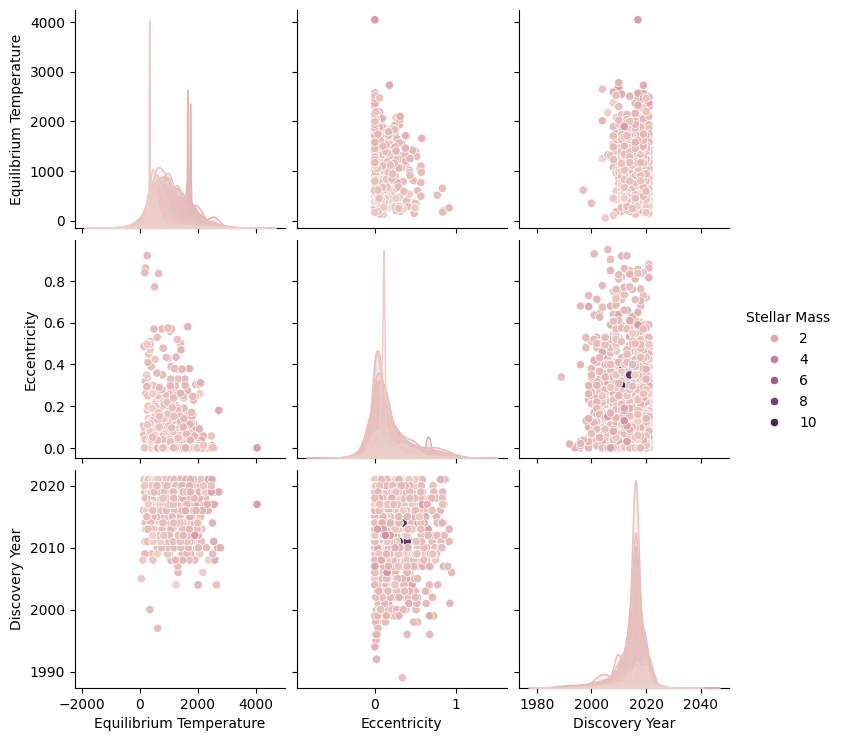

In [30]:
import seaborn as sns

# Pair plot of selected features
sns.pairplot(df[[ 'Equilibrium Temperature', 'Eccentricity', 'Discovery Year', 'Stellar Mass']], hue='Stellar Mass')
plt.show()


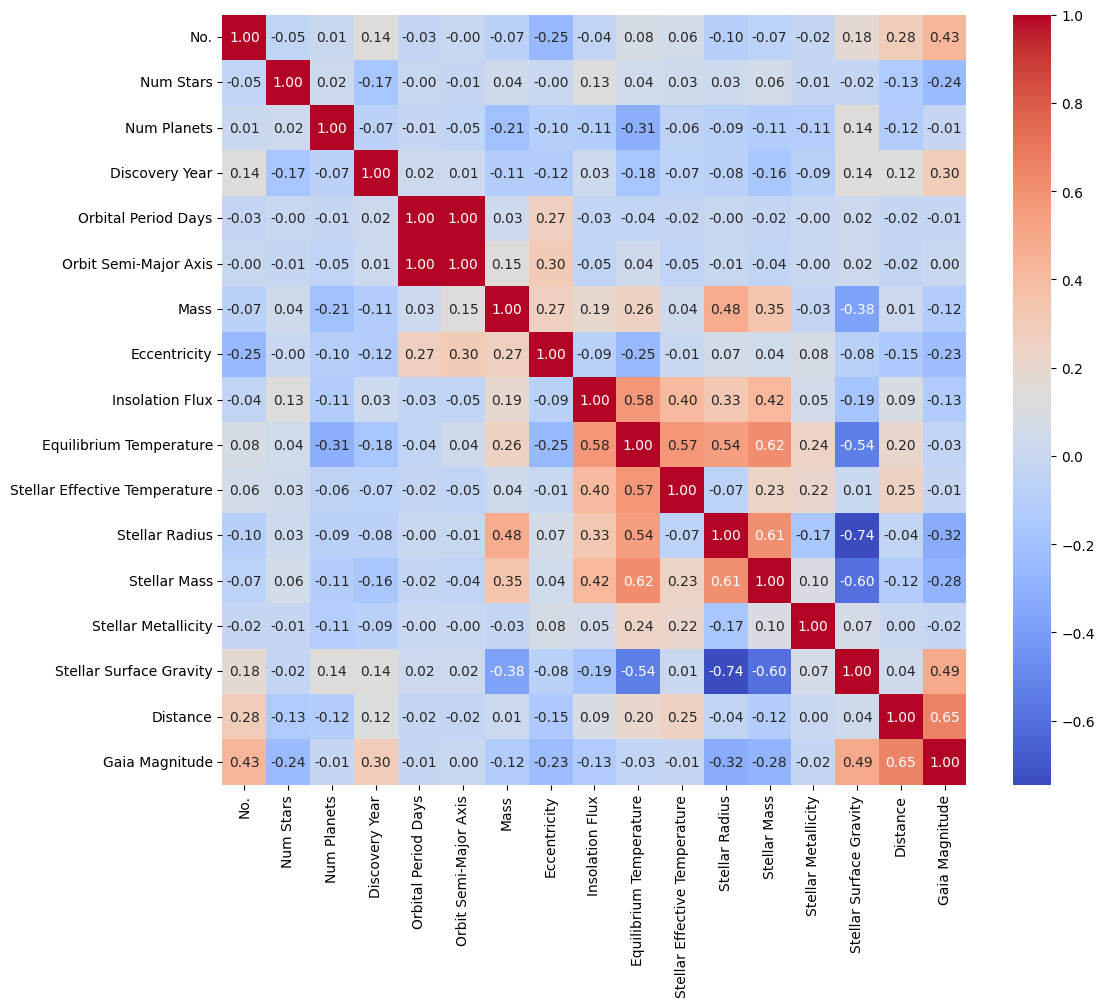

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# **`7.Data Spliting`**

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into 60% training, 20% validation, and 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Now split the temp set into 50% validation and 50% test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the size of each set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 2745 samples
Validation set: 915 samples
Test set: 915 samples


In [33]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path
data_path = "/content/drive/My Drive/Machine Learning/Exoplanet.csv"  # Replace with the actual path
df = pd.read_csv(data_path)

y_train = df['Stellar Mass']  # Replace 'Stellar Mass' with the actual target column name
print(y_train.unique())



[2.700e+00 2.780e+00 2.200e+00 9.000e-01 1.080e+00 1.220e+00 2.300e+00
 8.500e-01 9.900e-01 1.540e+00 1.900e-01 4.000e-01 1.100e-01 2.000e-02
 4.800e-01 8.000e-02 6.000e-01 1.930e+00 1.230e+00 9.800e-01 1.060e+00
 1.750e+00 1.030e+00 9.100e-01 1.440e+00 9.400e-01 1.340e+00 1.090e+00
 2.490e+00 2.400e+00 1.400e+00       nan 5.000e-01 1.140e+00 4.900e-01
 1.100e+00 1.083e+01 2.800e+00 8.000e-01 1.670e+00 8.100e-01 7.400e-01
 1.520e+00 8.200e-01 7.000e-01 1.470e+00 6.500e-01 2.120e+00 1.600e-01
 1.000e-02 3.500e-01 3.700e-01 9.500e-01 8.900e-01 1.270e+00 1.130e+00
 1.040e+00 1.210e+00 9.600e-01 1.290e+00 1.050e+00 1.010e+00 9.700e-01
 1.370e+00 1.250e+00 1.160e+00 1.000e+00 8.800e-01 5.100e-01 7.000e-02
 3.300e-01 8.700e-01 6.900e-01 2.900e-01 4.100e-01 7.800e-01 1.070e+00
 6.700e-01 7.300e-01 6.100e-01 9.300e-01 2.200e-01 5.600e-01 7.100e-01
 6.200e-01 1.170e+00 8.300e-01 1.110e+00 1.320e+00 5.000e-02 3.000e-01
 1.200e-01 1.800e-01 3.400e-01 3.800e-01 3.600e-01 4.300e-01 5.800e-01
 5.300

# **`8.Model Training and Evaluation:`**

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.27      0.41       203
         Low       0.94      0.51      0.66       297
      Medium       0.74      0.98      0.85       873

    accuracy                           0.77      1373
   macro avg       0.84      0.58      0.64      1373
weighted avg       0.80      0.77      0.74      1373



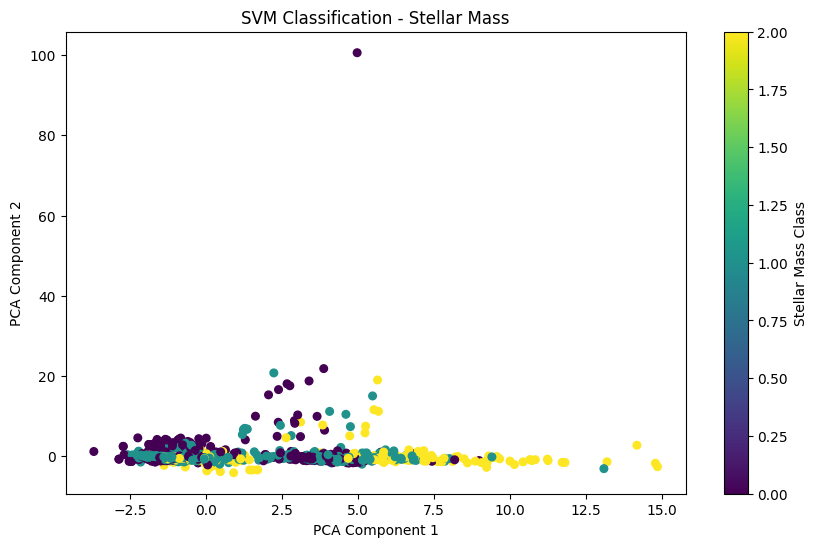

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



# Step 2: Handle missing values by imputing numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Step 3: Convert non-numeric columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 4: Convert 'Stellar Mass' to categories (Low, Medium, High)
# You can adjust the thresholds based on your data distribution
bins = [0, 0.8, 1.2, np.inf]  # Example thresholds for categorizing
labels = ['Low', 'Medium', 'High']
df['Stellar Mass'] = pd.cut(df['Stellar Mass'], bins=bins, labels=labels)

# Step 5: Separate features (X) and target (y)
X = df.drop(columns=['Stellar Mass'])  # Features
y = df['Stellar Mass']  # Target variable

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 8: Train the SVM classifier
svm = SVC(kernel='linear')  # You can try other kernels like 'rbf' if needed
svm.fit(X_train_normalized, y_train)

# Step 9: Make predictions and evaluate the model
y_pred = svm.predict(X_test_normalized)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_normalized)

# Step 11: Visualize the decision boundaries (for two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.map({'Low': 0, 'Medium': 1, 'High': 2}), cmap='viridis', s=30)
plt.title('SVM Classification - Stellar Mass')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Stellar Mass Class')
plt.show()

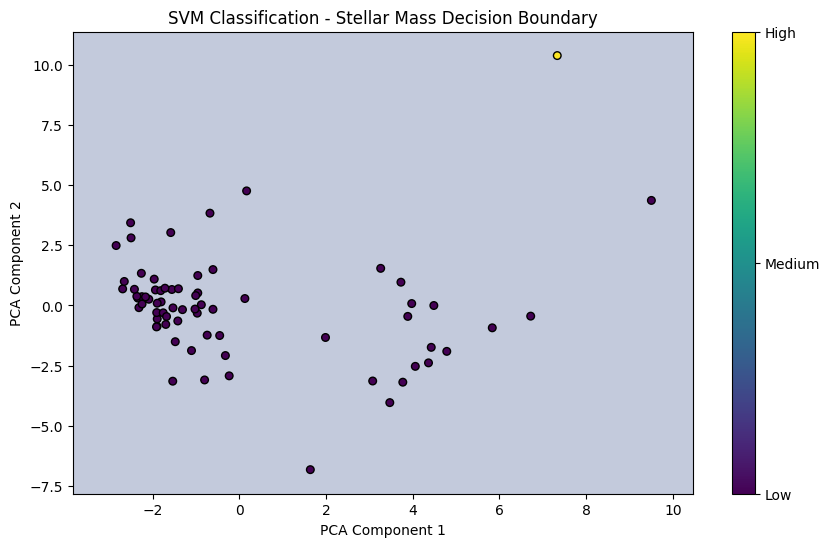

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'df' is already loaded
# Step 1: Take 100 random samples to avoid crashing due to large dataset size
df_sampled = df.sample(n=100, random_state=42)  # Sample 100 rows

# Step 2: Handle missing values (imputation for numerical columns)
numerical_cols = df_sampled.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df_sampled[numerical_cols] = imputer.fit_transform(df_sampled[numerical_cols])

# Step 3: One-hot encode categorical columns (e.g., 'Discovery Method', 'Discovery Facility')
df_encoded = pd.get_dummies(df_sampled, drop_first=True)

# Step 4: Separate features (X) and target (y)
X = df_encoded.drop(columns=['Stellar Mass'])  # Drop target and non-numeric columns
y = df_sampled['Stellar Mass']  # Target variable

# Step 5: Discretize the target variable into discrete classes (e.g., 'Low', 'Medium', 'High')
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Step 7: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)  # Normalize training data
X_test_normalized = scaler.transform(X_test)  # Normalize test data

# Step 8: Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_normalized, y_train)

# Step 9: Apply PCA on the normalized data to reduce it to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)

# Step 10: Create a meshgrid for the background color (decision boundary visualization)
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 11: Predict on each point in the meshgrid to visualize the decision boundary
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))  # Inverse PCA to map back to original space
Z = Z.reshape(xx.shape)

# Step 12: Plot the decision boundary using numeric labels for the contour
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Use numeric Z for plotting
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')
plt.title('SVM Classification - Stellar Mass Decision Boundary')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Step 13: Add colorbar with appropriate labels for categorical classes
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Low', 'Medium', 'High'])

plt.show()


# **`9.Error Analysis`**

In [6]:
from scipy.stats import zscore

# Select only numeric columns for z-score calculation
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Apply z-score to the numeric columns only
X_zscore = X_train[numeric_columns].apply(zscore)

# Identify outliers (z-score > 3 or < -3)
outliers = (X_zscore > 3) | (X_zscore < -3)

# Optionally, you can view the outliers or remove them
outlier_indices = outliers.any(axis=1)  # Get rows with any outliers
X_train_no_outliers = X_train[~outlier_indices]  # Remove rows with outliers

print(f"Outliers detected: {outlier_indices.sum()} rows")


Outliers detected: 16 rows


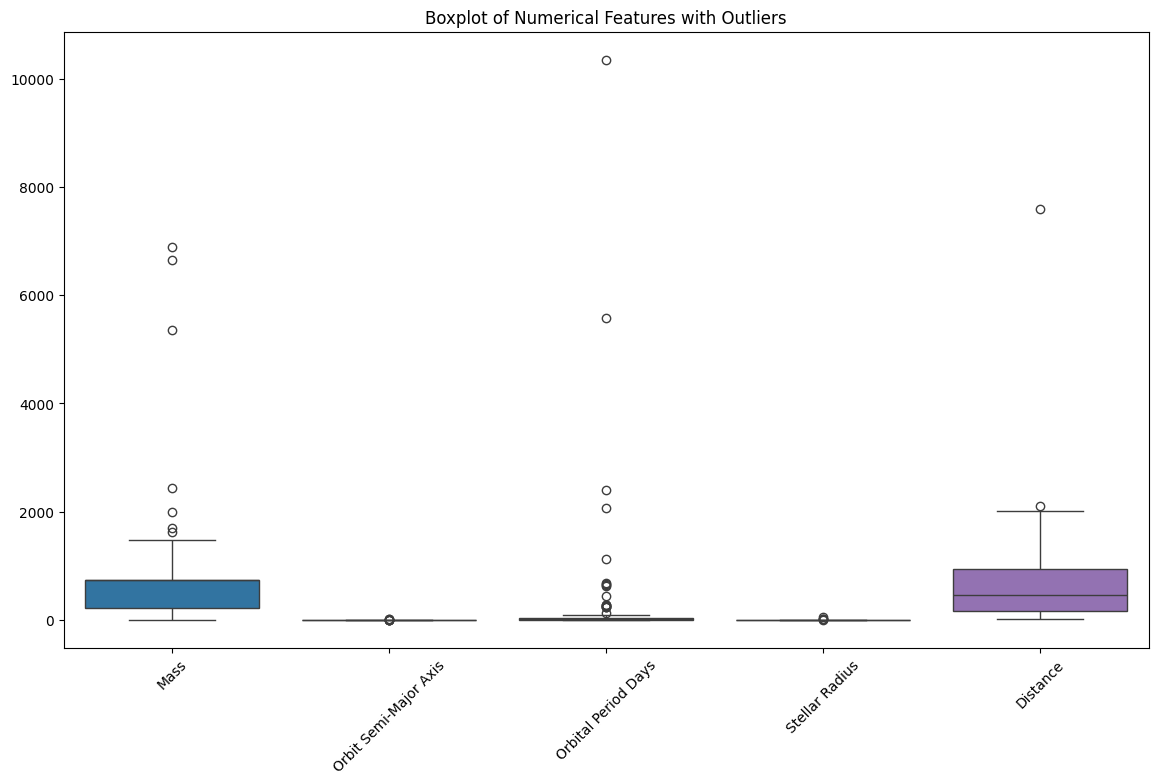

Outliers detected per feature:
Mass                     3
Orbit Semi-Major Axis    2
Orbital Period Days      2
Stellar Radius           1
Distance                 1
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = ['Mass', 'Orbit Semi-Major Axis', 'Orbital Period Days', 'Stellar Radius', 'Distance']

# Calculate Z-scores for selected features
from scipy.stats import zscore
z_scores = X[numeric_columns].apply(zscore)

# Identify outliers using Z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Plotting outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=X[numeric_columns])
plt.title('Boxplot of Numerical Features with Outliers')
plt.xticks(rotation=45)
plt.show()

# Count of outliers per feature
outlier_counts = outliers.sum()
print("Outliers detected per feature:")
print(outlier_counts)


# **`10.Bias and Fairness Assessment`**

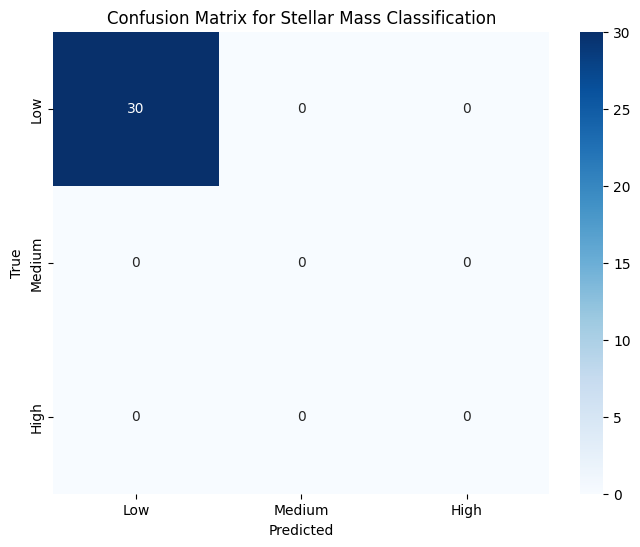

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        30
      Medium       0.00      0.00      0.00         0
        High       0.00      0.00      0.00         0

    accuracy                           1.00        30
   macro avg       0.33      0.33      0.33        30
weighted avg       1.00      1.00      1.00        30

Accuracy by Class:
Low: 1.0000
Medium: nan
High: nan
Demographic Parity (Positive Prediction Rate) by Class:
Low: 0.0000
Medium: nan
High: nan
True Positive Rate by Class:
Low: 1.0000
Medium: 0.0000
High: 0.0000
Disparate Impact by Class:
Low: nan
Medium: nan
High: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded and preprocessed (including X_train, X_test, y_train, y_test)

# Step 1: Handle missing values if required (example)
# X_train, X_test, y_train, y_test should be defined and preprocessed earlier

# Step 2: Discretize y_train and y_test into classes (Low, Medium, High)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Reshape y_train and y_test directly (without using .values) since they are NumPy arrays
y_train_binned = discretizer.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_binned = discretizer.transform(y_test.reshape(-1, 1)).flatten()

# Step 3: Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_normalized, y_train_binned)  # Train the model on normalized data

# Step 4: Make predictions on the test set
y_pred_binned = svm.predict(X_test_normalized)

# Step 5: Map numeric labels back to string labels ('Low', 'Medium', 'High')
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
y_test_labels = np.array([label_map[label] for label in y_test_binned])
y_pred_labels = np.array([label_map[label] for label in y_pred_binned])

# Step 6: Confusion Matrix to assess class-wise performance
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=['Low', 'Medium', 'High'])

# Step 7: Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Stellar Mass Classification')
plt.show()

# Step 8: Classification report to evaluate precision, recall, and F1 score
# Use the labels parameter explicitly to handle any class mismatch
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=['Low', 'Medium', 'High'], labels=['Low', 'Medium', 'High']))

# Step 9: Assess performance disparity by class
class_accuracy = {}
for label in ['Low', 'Medium', 'High']:
    label_mask = (y_test_labels == label)
    label_accuracy = np.mean(y_pred_labels[label_mask] == y_test_labels[label_mask])
    class_accuracy[label] = label_accuracy

print("Accuracy by Class:")
for label, accuracy in class_accuracy.items():
    print(f"{label}: {accuracy:.4f}")

# Step 10: Check for Demographic Parity (positive prediction ratio)
positive_predictions = (y_pred_labels == 'High')  # Assume we care about the 'High' class being predicted positively
demographic_parity = {}
for label in ['Low', 'Medium', 'High']:
    group_mask = (y_test_labels == label)
    positive_ratio = np.mean(positive_predictions[group_mask])
    demographic_parity[label] = positive_ratio

print("Demographic Parity (Positive Prediction Rate) by Class:")
for label, parity in demographic_parity.items():
    print(f"{label}: {parity:.4f}")

# Step 11: Evaluate Equal Opportunity (True Positive Rate for each class)
tpr = {}
for label in ['Low', 'Medium', 'High']:
    tp = np.sum((y_pred_labels == label) & (y_test_labels == label))
    fn = np.sum((y_pred_labels != label) & (y_test_labels == label))
    tpr[label] = tp / (tp + fn) if (tp + fn) > 0 else 0

print("True Positive Rate by Class:")
for label, rate in tpr.items():
    print(f"{label}: {rate:.4f}")

# Step 12: Disparate Impact (Ratio of positive predictions)
disparate_impact = {}
for label in ['Low', 'Medium', 'High']:
    group_mask = (y_test_labels == label)
    ratio = np.mean(positive_predictions[group_mask]) / np.mean(positive_predictions)
    disparate_impact[label] = ratio

print("Disparate Impact by Class:")
for label, impact in disparate_impact.items():
    print(f"{label}: {impact:.4f}")
